In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## EDA

In [2]:
ds = pd.read_csv("Modelar_UH2022_agg.txt", sep='|')
print(ds.head)
print(ds.shape)

<bound method NDFrame.head of          ID  SAMPLETIME   READING  DELTA
0         0  2019-02-01  33195300  24300
1         0  2019-02-02  33218900  23600
2         0  2019-02-03  33252400  33500
3         0  2019-02-04  33277600  25200
4         0  2019-02-05  33299600  22000
...     ...         ...       ...    ...
890831  999  2020-01-26   8739400  13500
890832  999  2020-01-27   8771000  31600
890833  999  2020-01-28   8791900  20900
890834  999  2020-01-29   8830900  39000
890835  999  2020-01-30   8848100  17200

[890836 rows x 4 columns]>
(890836, 4)


In [112]:
# ds['READING'] = ds['READINGINTEGER'] + ds['READINGTHOUSANDTH']/100
# ds['DELTA'] = ds['DELTAINTEGER'] + ds['DELTATHOUSANDTH']/100

In [3]:
ds['SAMPLETIME'] = pd.to_datetime(ds['SAMPLETIME'], infer_datetime_format=True)  

In [4]:
ds = ds.sort_values(by=['ID', 'SAMPLETIME'])

In [5]:
ds['SAMPLETIME'].dt.weekday

0         4
1         5
2         6
3         0
4         1
         ..
606648    5
606649    5
606650    1
606651    4
607017    5
Name: SAMPLETIME, Length: 890836, dtype: int64

In [6]:
ds['DAY'] = ds['SAMPLETIME'].dt.day # 
ds['HOUR'] = ds['SAMPLETIME'].dt.hour
ds['MONTH'] = ds['SAMPLETIME'].dt.month
ds['YEAR'] = ds['SAMPLETIME'].dt.year
ds['WEEKDAY'] = ds['SAMPLETIME'].dt.weekday

/home/jose/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY', ylabel='DELTA'>

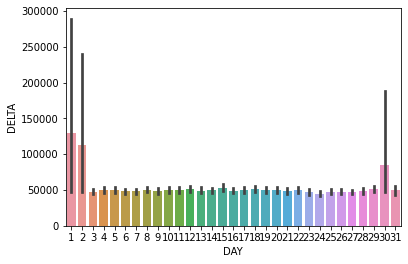

In [9]:
sns.barplot("DAY","DELTA", data = ds)

/home/jose/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUR', ylabel='DELTA'>

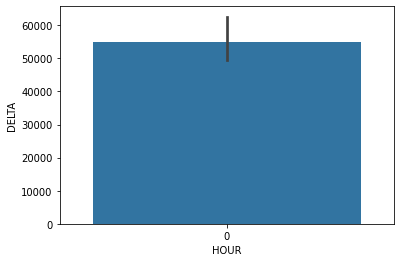

In [10]:
sns.barplot("HOUR","DELTA", data = ds)

/home/jose/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH', ylabel='DELTA'>

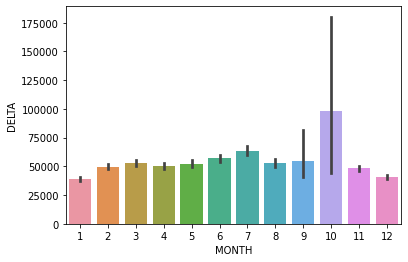

In [11]:
sns.barplot("MONTH","DELTA", data = ds)

/home/jose/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WEEKDAY', ylabel='DELTA'>

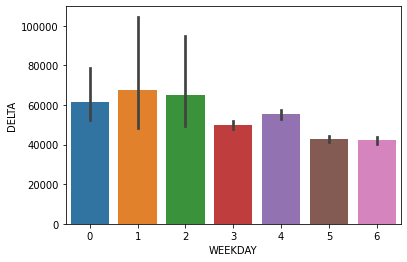

In [12]:
sns.barplot("WEEKDAY","DELTA", data = ds)

In [131]:
ds = np.array(ds).reshape(-1, 8759, 13)
print(ds.shape)

(11, 8759, 13)


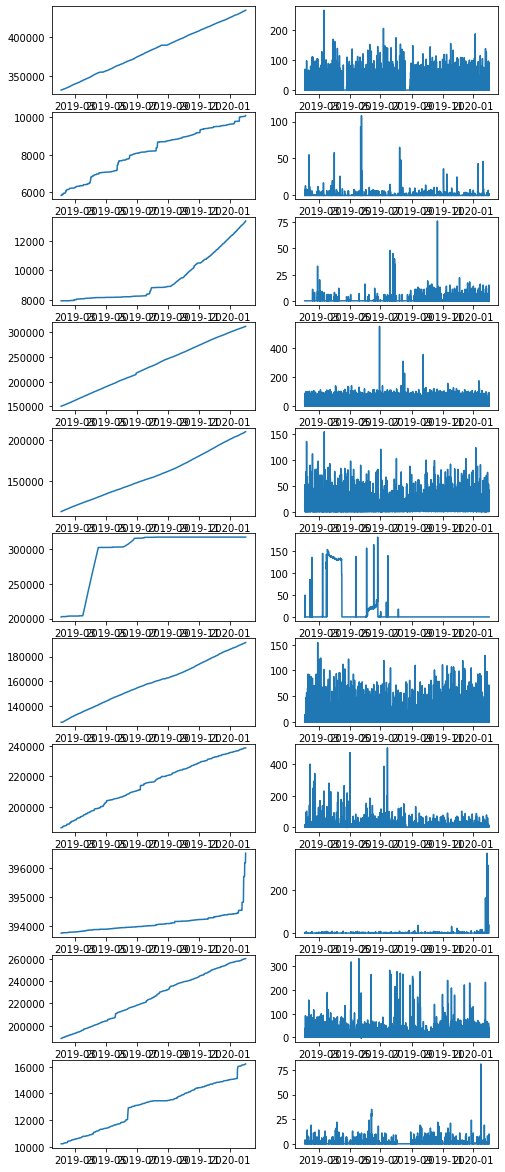

In [132]:
fig, ax = plt.subplots(11,2, figsize=(8,21))
for i in range(11):
    ax[i][0].plot(ds[i,:,1], ds[i,:,-7])
    ax[i][1].plot(ds[i,:,1], ds[i,:,-6])

## // TODO: agrupar todo por día de la semana, día del mes, mes y hora para ver cuando se consume más

In [96]:
ts = []

for serie in ds['ID'].unique():
    if serie% 20 == 0 :print('reading serie:'+ str(serie))
    
    serie_samples = pd.Series(data=np.zeros(365),index=ds['SAMPLETIME'].unique())
    sample = ds.loc[ds['ID'] == serie, 'DELTA']
    sample.index = ds.loc[ds['ID'] == serie, 'SAMPLETIME']
    serie_samples.loc[ds.loc[(ds['ID'] == serie), 'SAMPLETIME']] = sample
    # serie_samples = ds.loc[(ds['ID'] == serie) &  (ds['SAMPLETIME'] == ds['SAMPLETIME'].unique()), 'DELTA']
    # print(len(serie_samples))
    # for moment in ds['SAMPLETIME'].unique():
    #     sample = serie_samples = ds.loc[(ds['ID'] == serie) &  (ds['SAMPLETIME'] == moment), 'DELTA']
    #     serie_samples.append(sample)
    ts.append(serie_samples)
ts = np.array(ts)

reading serie:0
reading serie:20
reading serie:40
reading serie:60
reading serie:80
reading serie:100
reading serie:120
reading serie:140
reading serie:160
reading serie:180
reading serie:200
reading serie:220
reading serie:240
reading serie:260
reading serie:280
reading serie:300
reading serie:320
reading serie:340
reading serie:360
reading serie:380
reading serie:400
reading serie:420
reading serie:440
reading serie:460
reading serie:480
reading serie:500
reading serie:520
reading serie:540
reading serie:560
reading serie:580
reading serie:600
reading serie:620
reading serie:640
reading serie:660
reading serie:680
reading serie:700
reading serie:720
reading serie:740
reading serie:760
reading serie:780
reading serie:800
reading serie:820
reading serie:840
reading serie:860
reading serie:880
reading serie:900
reading serie:920
reading serie:940
reading serie:960
reading serie:980
reading serie:1000
reading serie:1020
reading serie:1040
reading serie:1060
reading serie:1080
reading ser

607017    1200
Name: DELTA, dtype: int64

In [121]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
# X_train = TimeSeriesScalerMeanVariance().fit_transform(ts[:300])
km = TimeSeriesKMeans(n_clusters=10, metric="dtw")
y_pred = km.fit_predict(X_train)

/tmp/ipykernel_8198/564673449.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_8198/564673449.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_8198/564673449.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_8198/564673449.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_8198/564673449.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-elem

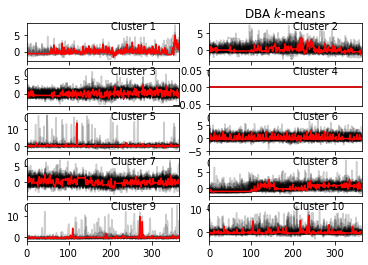

In [125]:
n = 10

for yi in range(n):
    plt.subplot(n/2, 2, yi+1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 365)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

## Modelo

In [133]:
X_train = ds[:, :-336, -5:-1]
y_train = ds[:, :-336, -6]

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers import LSTM

In [134]:
model = Sequential([
                LSTM(128,input_shape=( X_train.shape[1], X_train.shape[2]), return_sequences=True, use_bias=True,
                                      dropout=0.2),
                # Lambda(lambda x: x[:, -366:, :]),
                Dense(units=1)
            ])

model.compile(loss='mean_squared_error', optimizer='adam')

In [135]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_train = np.asarray(X_train).astype(np.float32)

y_train = np.asarray(y_train).astype(np.float32)

In [136]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 8423, 4) <dtype: 'float32'>
(None, 8423, 1) <dtype: 'float32'>
lstm_6 (None, 8423, 4) float32
dense_6 (None, 8423, 128) float32


[None, None]

In [61]:
ds[:, :, -5].shape


(11, 8759)

In [137]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 465.3533
Epoch 2/30
1/1 [==============================] - 6s 6s/step - loss: 461.1195
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 457.0470
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 452.8835
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 448.3763
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 443.4477
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 437.9691
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 432.0531
Epoch 9/30
1/1 [==============================] - 6s 6s/step - loss: 426.3462
Epoch 10/30
1/1 [==============================] - 6s 6s/step - loss: 421.4406
Epoch 11/30
1/1 [==============================] - 5s 5s/step - loss: 417.6948
Epoch 12/30
1/1 [==============================] - 5s 5s/step - loss: 414.8592
Epoch 13/30
1/1 [==============================] - 5s 5s/step

In [138]:
X_test = ds[:, 336:, -5:-1]
y_test = ds[:, 336:, -6]

In [139]:
X_test = (X_test - X_test.mean()) / X_test.std()
X_test = np.asarray(X_test).astype(np.float32)

y_test = np.asarray(y_test).astype(np.float32)

In [140]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 2s 2s/step - loss: 412.2829


412.28289794921875

In [74]:
from sklearn.metrics import mean_squared_error

In [141]:
preds = model.predict(X_test)

In [142]:
mean_squared_error(preds[:, -336:].reshape(-1), y_test[:, -336:].reshape(-1))

318.37158

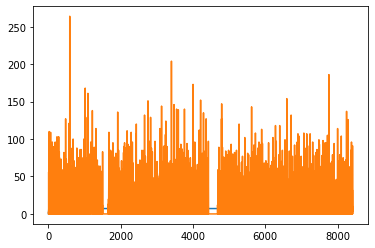

In [143]:
plt.plot(preds[0,:])
plt.plot(y_test[0,:])

No da ni una xd

## Bibliografía

https://www.kaggle.com/tarunpaparaju/m5-competition-eda-models/notebook#EDA-

https://unipython.com/prediccion-con-series-temporales-con-lstm-redes-neuronales-recurrentes/